# Rough notebook for debugging

In [1]:
import os
from types import SimpleNamespace
import numpy
import matplotlib.pyplot as pyplot
import boxkit
import boxkit.resources.flash as boxapi

In [2]:
dataset_dir = "../../simulation/RisingBubble/Benchmark/Case2/h160/jobnode.archive/2023-11-07"

tag = 0
time_scale = 0.71
length_scale = 0.5

dataset=boxkit.read_dataset(os.path.join(dataset_dir, 
                                         "INS_Rising_Bubble_hdf5_plt_cnt_" + str(tag).zfill(4)), source="flash")

merged_dataset = boxkit.mergeblocks(dataset, ["dfun", "velx", "vely"], nthreads=1, backend="loky")
merged_dataset.fill_guard_cells()

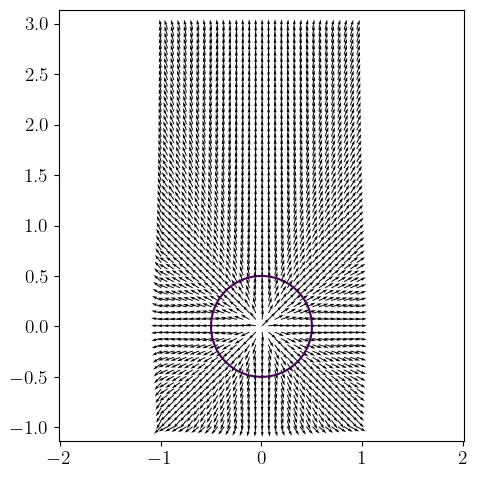

In [3]:
pyplot.rc("font", family="serif", size=14, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)
figure, ax = pyplot.subplots(figsize=[5,5])
boxapi.lset_plot_contour_2d(ax, merged_dataset)
boxapi.lset_plot_normals_2d(ax, merged_dataset, scale=40)
pyplot.axis('equal')
pyplot.tight_layout()
pyplot.show()

In [4]:
bubblelist = boxapi.lset_shape_measurement_2d(merged_dataset, correction=True)

In [5]:
max_area = 1e-13
main_bubble = None
main_bubble_index = 0

for index, bubble in enumerate(bubblelist):
    if bubble["area"] > max_area:
        main_bubble = bubble
        main_bubble_index = index
        
circularity = 2*numpy.pi*numpy.sqrt(main_bubble["area"]/numpy.pi)/main_bubble["perimeter"]

In [6]:
print(circularity,main_bubble["perimeter"])

[1.00080344] [3.1382748]


In [7]:
main_bubble

{'area': 0.7850000000000001,
 'centroid': [-0.006249999999999978, -0.006249999999999978],
 'perimeter': array([3.1382748])}

In [8]:
quantlist = boxapi.lset_quant_measurement_2d(merged_dataset)

In [9]:
quantlist[0]["velocity"]*(0.5/0.7)

array([0., 0.])